Mid-term Exam
====

This is a **closed book** exam. You can use the help function within Jupyer (e.g. `range?`) but not use any external reference or search engine. 

In [2]:
import numpy as np
import numpy.random as rng
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
from sympy import symbols, integrate, exp, oo
%matplotlib inline

**Question 1 (10 points)**

Using the `iris` dataset, answer the following questions:

- Find the mean, min and max values of all four measurements (sepal.length, sepal.width, petal.length, petal.width) for each species
- Find the average petal.width for rows where the petal.length is less than the sepal.width

In [42]:
iris = sns.load_dataset('iris')

In [43]:
iris.groupby('species').agg(['mean', 'min', 'max'])

sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.428  2.3  4.4        1.462  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.246  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5

In [44]:
iris.ix[iris.petal_length < iris.sepal_width, 'petal_width'].mean()

0.2459999999999999

**Question 2 (10 points)**

Write a function `peek(df, n)` to display a random selection of $n$ rows of any dataframe (without repitition). Use it to show 5 random rows from the iris data set. The function should take as inputs a dataframe and an integer.

### Solution 1

Most students did some variant of this. Minor deductions if sampling with replacement was used. No points deducted for not checking if $n$ was reasonable.

In [45]:
def peek(df, n):
    """Return n random rows from a dataframe df."""
    if n < 1:
        return None
    if n > len(df):
        return df
    
    idx = np.random.choice(len(df), n, replace=False)
    return df.ix[idx]

### Solution 2

Full points awarded if you noticed that this functionality is already built-in.

In [46]:
def peek2(df, n):
    return df.sample(n)

In [47]:
peek(iris, 5)

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
148,6.2,3.4,5.4,2.3,virginica
129,7.2,3.0,5.8,1.6,virginica
118,7.7,2.6,6.9,2.3,virginica


In [48]:
peek2(iris, 5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
31,5.4,3.4,1.5,0.4,setosa
102,7.1,3.0,5.9,2.1,virginica
56,6.3,3.3,4.7,1.6,versicolor
23,5.1,3.3,1.7,0.5,setosa


**Question 3 (30 points)**

You are given the following set of data

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

- Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$. (5 points)

- Write your own **gradient descent** optimization function to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Do **not** use a gradient descent algorithm from a package such as `scipy-optimize` or `scikit-learn`.  You can use a simple for loop - start with the parameters `beta = np.zeros(3)` with a learning rate $\alpha = 0.0001$ and run for 100000 iterations. (15 points)

- Plot the data together with the fitted polynomial. (10 points)



In [49]:
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])

### Comments

Some confusion about this. The matrix $A$ is either of the two matrices below. Then we just the given normal equations using the `solve` function. 

#### Linear fit

In [65]:
np.c_[np.ones(10), x]

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.]])

#### Quadratic fit

In [67]:
np.c_[np.ones(10), x, x**2]

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.]])

### Linear fit

In [62]:
from scipy.linalg import solve

X = np.c_[np.ones(10), x]
beta1 = solve(X.T@X, X.T@y)
beta1

array([ 27.04507225, -11.05592192])

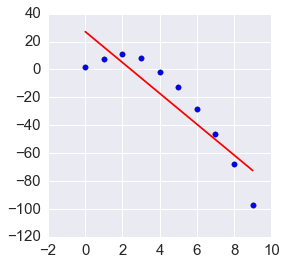

In [64]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, s=30)
plt.plot(x, beta1[0] + beta1[1]*x, color='red')
pass

### Quadratic fit

In [52]:
from scipy.linalg import solve

X = np.c_[np.ones(10), x, x**2]
beta1 = solve(X.T@X, X.T@y)
beta1

array([ 2.55079998,  7.31478229, -2.04118936])

### Comments

A similar example was provided at in the [course notes](http://people.duke.edu/~ccc14/sta-663-2016/13_Optimization.html#Gradient-descent-for-least-squares-minimization). You can eithr use the following gradient function shown below or the equivalent matrix version shown below.

In [53]:
def f(x, y, b):
    return (b[0] + b[1]*x + b[2]*x**2 - y)

def res(x, y, b):
    return sum(f(x,y, b)*f(x, y, b))

def grad(x, y, b):
    n = len(x)
    return np.array([
            sum(f(x, y, b)),
            sum(x*f(x, y, b)),
            sum(x**2*f(x, y, b))
    ])

In [54]:
grad(x, y, np.zeros(3))

array([   227.0657638 ,   1933.9094954 ,  15758.14427298])

### Equivalent matrix version of gradient

We want to minimize the $y - A\hat{x}$ using least squares. This means that the objective function is $(y - A\hat{x})^T(y- A\hat{x})$. If we expand and simplify, we get

$$
\begin{align}
(y - A\hat{x})^T(y- A\hat{x}) &= y^Ty - y^T A \hat{x} - \hat{x}^TA^T y + A^TA \hat{x}^T x \\
&= y^Ty - 2A^Ty \hat{x} + \|A^TA\|^2 \|\hat{x}\|^2
\end{align}
$$

We want to minimize with respect to $\hat{x}$, so take gradient is $A^TA \hat{x} - A^T y + $ (we get rid of the constant factor for convenience).

In [61]:
X.T@X@np.zeros(3)- X.T@y

array([   227.0657638 ,   1933.9094954 ,  15758.14427298])

In [17]:
a = 0.0001 # learning rate
beta2 = np.zeros(3)
for i in range(100000):
    beta2 -= a * grad(x, y, beta2)

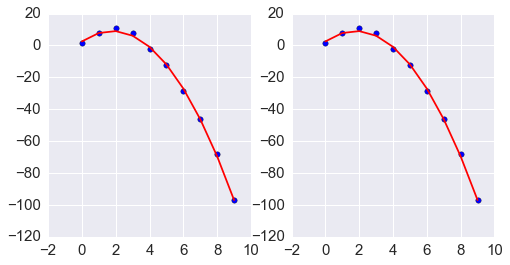

In [18]:
plt.figure(figsize=(8,4))
for i, beta in enumerate([beta1, beta2], 1):
    plt.subplot(1, 2, i)
    plt.scatter(x, y, s=30)
    plt.plot(x, beta[0] + beta[1]*x + beta[2]*x**2, color='red')

**Question 4 (20 points)**

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_1    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Write the system in matrix form $Ax=b$ and define these in numpy or scipy.
2. Show that $A$ is positive-definite
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.


### Comments

Checking that the determiniat is positive is not sufficient. For example.
$$
\pmatrix{-1 & 0 \\ 0 & -1}
$$
has a positive determinant but is not positive definite. You need to check that all sub-determinants are positive. Or mucyh easier, just find the eigenvalues.

Since this is positve definite, the Cholesky is the most efficient method. See [course notes](http://people.duke.edu/~ccc14/sta-663-2016/08_LinearAlgebra2.html#Cholesky-Decomposition)

In [1]:
import scipy.linalg as la
import numpy as np

In [3]:
# 1. Define as matrix equation
A = np.array([[2,-1,1],[-1,2,-1],[1,-1,1]])
b = np.array([6,2,1])

# 2. All eigenvalues are positive => A is positive-definite
print(la.eig(A)[0])

# 3. As A is positive-definite and symmetric, Cholesky is the best decomposition
L = la.cholesky(A)

# First solve Ly = b
y = la.solve(np.transpose(L),b)
print(y)

# Then solve L^T x = y

x = la.solve(L,y)

print(x)

[ 3.73205081+0.j  1.00000000+0.j  0.26794919+0.j]
[ 4.24264069  4.0824829  -0.57735027]
[ 5.  3. -1.]


### Comments

Here is the short way to do it

In [20]:
la.cho_solve(la.cho_factor(A), b)

array([ 5.,  3., -1.])

**Question 5 (10 points)**

Let

$A = \left(\begin{matrix}2 & -1 &1\\-1& 2& -1 \\1&-1& 1
\end{matrix}\right) \;\;\;\;\;\;\textrm{ and }\;\;\;\;\;\; v = \left(\begin{matrix}1 \\ 1 \\2\end{matrix}\right)$

Find $w$ such that $w$ is conjugate to $v$ under $A$. You may use *basic* linear algebra in scipy or numpy - i.e. matrix products.

### Commens

There is an entire plane in $\mathbb{R}^2$ orthogoal to $v$. Any vector in the plane will do. Ideally, you should use Gram-Shmiidt (or at least the projection part) since this will generalize to arbitrary matrices $A$, but I did not take off points if you used some other method.

In [8]:
A = np.array([[2,-1,1],[-1,2,-1],[1,-1,1]])
v = np.array([1,1,2])

# We just need to choose any vector that is NOT colinear with v, and then subtract 
# the projection in the inner product defined by A

w_init = np.array([0,1,0])

w = w_init - ((w_init.dot(A.dot(v)))/(v.dot(A.dot(v))))*v

w, w.dot(A.dot(v))

(array([ 0.16666667,  1.16666667,  0.33333333]), -1.1102230246251565e-16)

**Question 6 (20 points)**

- The Cauchy distribution is given by 
$$
f(x) = \frac{1}{\pi (1 + x^2)}, \ \ -\infty \lt x \lt \infty 
$$

Integrate the tail probability $P(X > 2)$ using Monte Carlo integration with 1 million samples from the uniform distribution using an appropriate change of variables (10 points)

- Estimate the following integral using Monte Carlo integration and 1 million draws.  Hint: See figure. (10 points)

$$
\int_{-\infty}^{\infty} x^2 \frac{1}{2}e^{-|x|} dx
$$

![Hint](./dexp.png)

### Comments

For part 1 a change of variables should lead to an integral between 0 and 1 and you can sample from $U(0,1)$. For part 2, the idea was to use importance sampling, but if you noticed that the function was the Laplace PDF and just generated ranodm samples from the Laplace distribution, no points were dedcuted.

Both approaches are described here in the [course notes](http://people.duke.edu/~ccc14/sta-663-2016/15C_MonteCarloIntegration.html#Variance-Reduction).

#### Part 1

In [25]:
n = 1000000
x = stats.uniform().rvs(n)
np.mean(2/(np.pi*(x**2+4)))

0.14758155448092389

#### Check (not required)

In [28]:
1 -  stats.cauchy.cdf(2)

0.14758361765043326

#### Part 2

In [23]:
import scipy.stats as stats

def p(x):
    """Double exponential density."""
    return 0.5*np.exp(-np.abs(x))

n = 1000000
x = stats.norm(0, 2).rvs(n)
np.mean(x**2 * p(x)/stats.norm(0, 2).pdf(x))

2.052045567177323

#### Check (not required)

In [1]:
from sympy import symbols, integrate, exp, oo

x = symbols('x')
integrate(x**2 * exp(-x), (x, 0, oo))

2